## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data



##### Importación de librerías

In [2]:
import pandas as pd
# from ydata_profiling import ProfileReport
import dtale as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

----

##### Lectura de los datasets

In [7]:
df_creditos = pd.read_csv("../data/raw/datos_creditos.csv", sep=";")
df_creditos.head(1)



,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,estado_credito,falta_pago
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,1,Y


In [5]:
df_tarjetas = pd.read_csv("../data/raw/datos_tarjetas.csv", sep=";")
df_tarjetas.head(1)

,id_cliente,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0


In [9]:
print(df_creditos.columns)
print(df_tarjetas.columns)

Index(['id_cliente', 'edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'situacion_vivienda', 'ingresos',
       'objetivo_credito', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'falta_pago'],
      dtype='object')
Index(['id_cliente', 'antiguedad_cliente', 'estado_civil', 'estado_cliente',
       'gastos_ult_12m', 'genero', 'limite_credito_tc', 'nivel_educativo',
       'nivel_tarjeta', 'operaciones_ult_12m', 'personas_a_cargo'],
      dtype='object')


----

##### Descripción de los datasets

In [10]:
def reporte_descripcion_dataset(df):
    columnas = df.columns
    print("Columnas del dataset:\n")
    for col in columnas:
        print(col)
    print(f"\nCantidad de filas: {df.shape[0]}")

In [11]:
print("Descripción del dataset 'datos_creditos'")
reporte_descripcion_dataset(df_creditos)

Descripción del dataset 'datos_creditos'
Columnas del dataset:

id_cliente
edad
importe_solicitado
duracion_credito
antiguedad_empleado
situacion_vivienda
ingresos
objetivo_credito
pct_ingreso
tasa_interes
estado_credito
falta_pago

Cantidad de filas: 10127


In [12]:
print("Descripción del dataset 'datos_tarjetas'")
reporte_descripcion_dataset(df_tarjetas)

Descripción del dataset 'datos_tarjetas'
Columnas del dataset:

id_cliente
antiguedad_cliente
estado_civil
estado_cliente
gastos_ult_12m
genero
limite_credito_tc
nivel_educativo
nivel_tarjeta
operaciones_ult_12m
personas_a_cargo

Cantidad de filas: 10127


----

##### Obtención de metadatos

In [13]:
# Se usa la librería dtale para poder obtener una vista interactiva de los datos

# Dataset: datos_creditos

creditos = dt.show(df_creditos)
creditos.open_browser()

In [14]:
# Dataset: datos_tarjetas

tarjetas = dt.show(df_tarjetas)
tarjetas.open_browser()

INTEGRO LAS DOS BASES DE DATOS

In [15]:
data_completa = pd.merge(df_creditos,df_tarjetas,on=['id_cliente'])
data_completa

,id_cliente,edad,importe_solicitado,duracion_credito,antiguedad_empleado,situacion_vivienda,ingresos,objetivo_credito,pct_ingreso,tasa_interes,...,antiguedad_cliente,estado_civil,estado_cliente,gastos_ult_12m,genero,limite_credito_tc,nivel_educativo,nivel_tarjeta,operaciones_ult_12m,personas_a_cargo
0,713061558.0,22,35000,3,123.0,ALQUILER,59000,PERSONAL,0.59,16.02,...,36.0,CASADO,ACTIVO,1088.0,M,4010.0,UNIVERSITARIO_COMPLETO,Blue,24.0,2.0
1,768805383.0,21,1000,2,5.0,PROPIA,9600,EDUCACIÓN,0.10,11.14,...,39.0,CASADO,ACTIVO,1144.0,M,12691.0,SECUNDARIO_COMPLETO,Blue,42.0,3.0
2,818770008.0,25,5500,3,1.0,HIPOTECA,9600,SALUD,0.57,12.87,...,44.0,SOLTERO,ACTIVO,1291.0,F,8256.0,UNIVERSITARIO_COMPLETO,Blue,33.0,5.0
3,713982108.0,23,35000,2,4.0,ALQUILER,65500,SALUD,0.53,15.23,...,36.0,CASADO,ACTIVO,1887.0,M,3418.0,UNIVERSITARIO_COMPLETO,Blue,20.0,3.0
4,710821833.0,24,35000,4,8.0,ALQUILER,54400,SALUD,0.55,14.27,...,54.0,CASADO,ACTIVO,1314.0,M,9095.0,DESCONOCIDO,Blue,26.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,713755458.0,25,7000,4,9.0,PROPIA,65000,PERSONAL,0.11,11.66,...,36.0,DESCONOCIDO,PASIVO,10310.0,M,9959.0,DESCONOCIDO,Blue,63.0,1.0
10123,717406983.0,22,9575,3,1.0,ALQUILER,43000,PAGO_DEUDAS,0.22,6.62,...,36.0,DESCONOCIDO,PASIVO,8395.0,M,5281.0,UNIVERSITARIO_COMPLETO,Blue,62.0,2.0
10124,716506083.0,22,9600,2,0.0,ALQUILER,21600,EDUCACIÓN,0.44,7.49,...,36.0,CASADO,PASIVO,10291.0,F,5409.0,SECUNDARIO_COMPLETO,Blue,60.0,1.0
10125,714337233.0,23,9600,2,3.0,ALQUILER,22000,EDUCACIÓN,0.44,13.16,...,25.0,CASADO,PASIVO,10294.0,F,10388.0,UNIVERSITARIO_COMPLETO,Silver,61.0,2.0


In [17]:
data_completa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10127 non-null  float64
 1   edad                 10127 non-null  int64  
 2   importe_solicitado   10127 non-null  int64  
 3   duracion_credito     10127 non-null  int64  
 4   antiguedad_empleado  9790 non-null   float64
 5   situacion_vivienda   10127 non-null  object 
 6   ingresos             10127 non-null  int64  
 7   objetivo_credito     10127 non-null  object 
 8   pct_ingreso          10127 non-null  float64
 9   tasa_interes         9215 non-null   float64
 10  estado_credito       10127 non-null  int64  
 11  falta_pago           10127 non-null  object 
 12  antiguedad_cliente   10127 non-null  float64
 13  estado_civil         10127 non-null  object 
 14  estado_cliente       10127 non-null  object 
 15  gastos_ult_12m       10127 non-null 

In [18]:
# Eliminar filas con valores faltantes
data_completa_sin_nulos = data_completa.dropna()
data_completa_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8902 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           8902 non-null   float64
 1   edad                 8902 non-null   int64  
 2   importe_solicitado   8902 non-null   int64  
 3   duracion_credito     8902 non-null   int64  
 4   antiguedad_empleado  8902 non-null   float64
 5   situacion_vivienda   8902 non-null   object 
 6   ingresos             8902 non-null   int64  
 7   objetivo_credito     8902 non-null   object 
 8   pct_ingreso          8902 non-null   float64
 9   tasa_interes         8902 non-null   float64
 10  estado_credito       8902 non-null   int64  
 11  falta_pago           8902 non-null   object 
 12  antiguedad_cliente   8902 non-null   float64
 13  estado_civil         8902 non-null   object 
 14  estado_cliente       8902 non-null   object 
 15  gastos_ult_12m       8902 non-null   float

----

##### Gráficos de interés

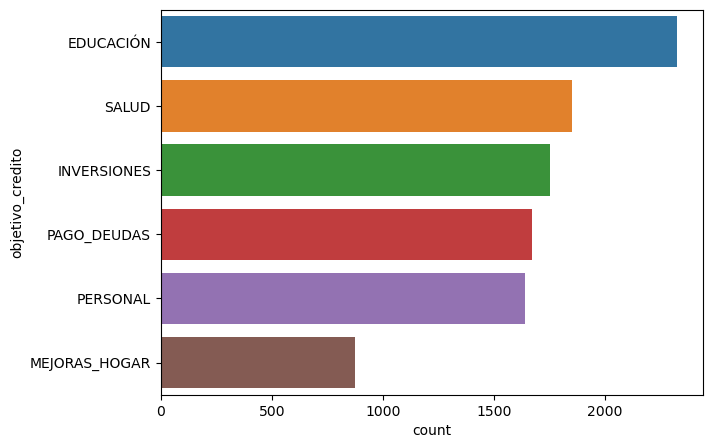

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(y=df_creditos['objetivo_credito'], order=df_creditos['objetivo_credito'].value_counts().index)
plt.show()

DIAGRAMA DE CAJAS PARA OBSERVAR LA DISTRIBUCIÓN DE LAS VARIABLES DEPENDIENTES CON LA VARIABLE OBJETIVO "falta_pago":

In [23]:
data_completa_sin_nulos = data_completa_sin_nulos.drop(["id_cliente"], axis=1)

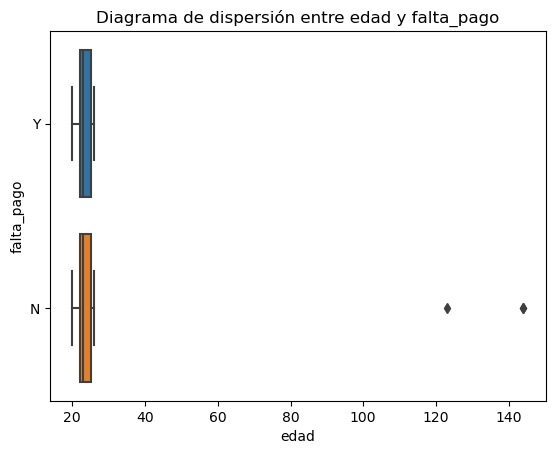

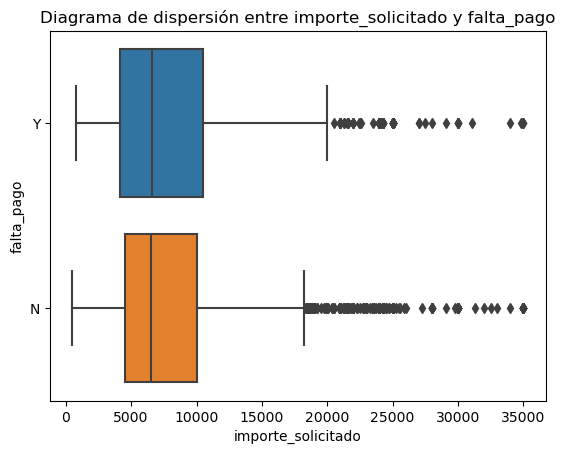

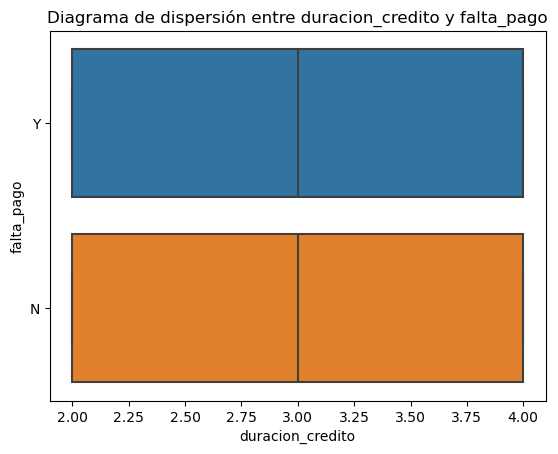

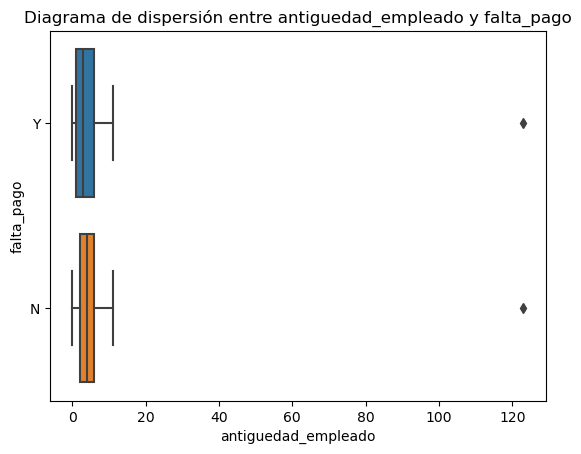

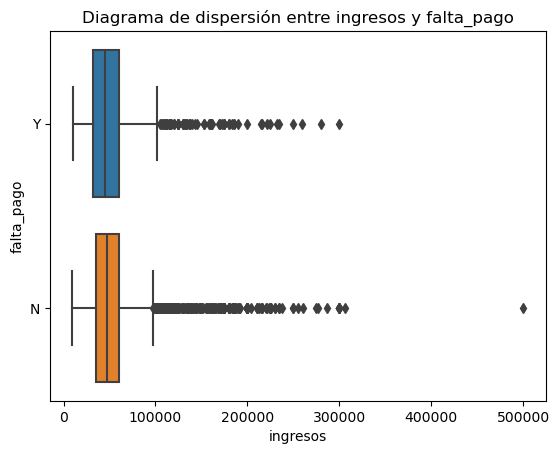

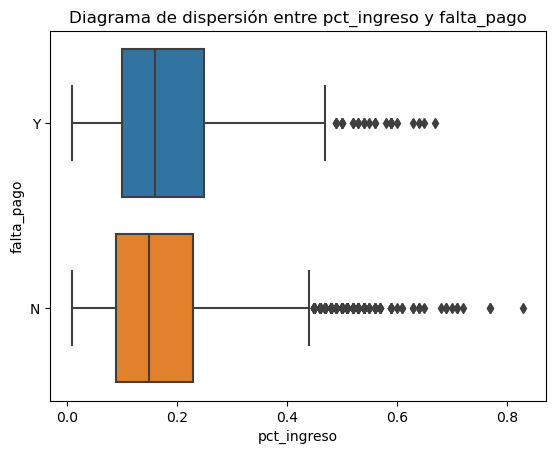

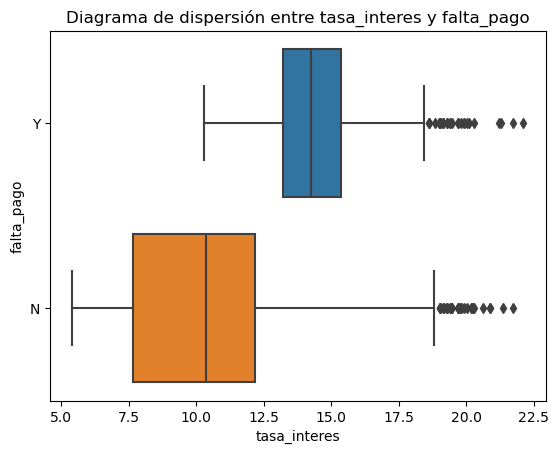

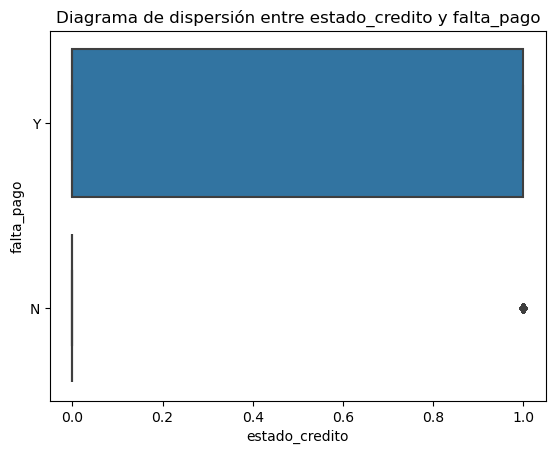

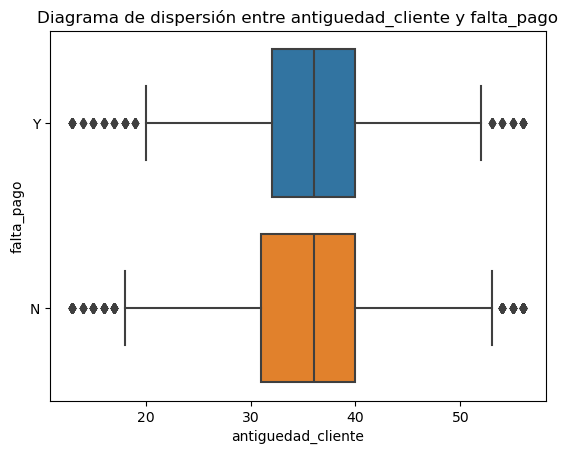

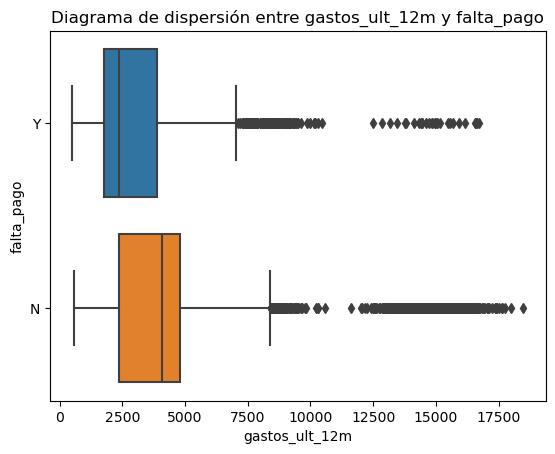

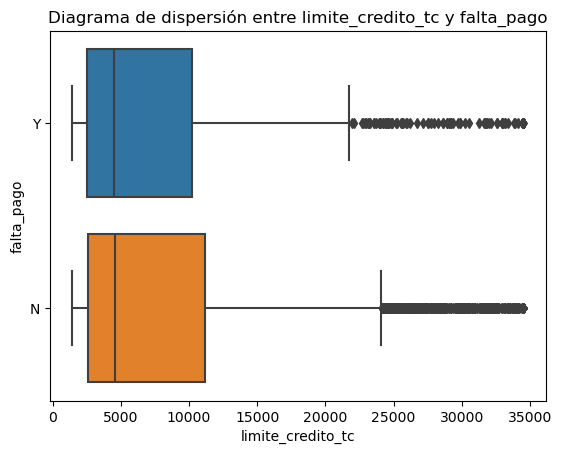

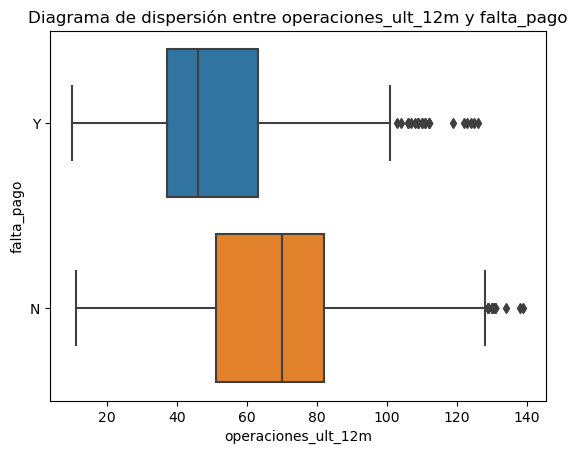

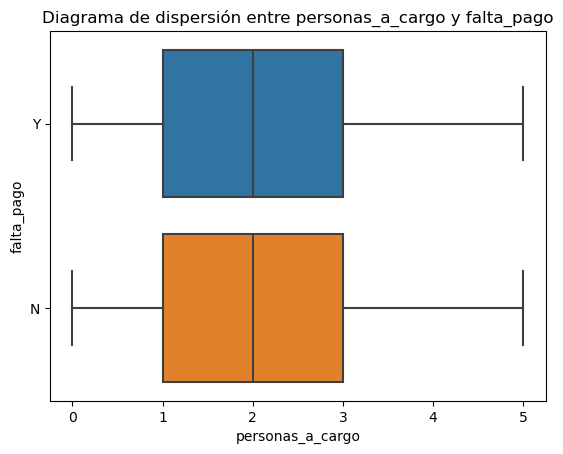

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
df_numeric = data_completa_sin_nulos.select_dtypes(include=['number'])


for variable in df_numeric.columns:
    if variable != 'falta_pago':
        sns.boxplot(data=data_completa_sin_nulos, x=variable, y='falta_pago')
        plt.title(f'Diagrama de dispersión entre {variable} y falta_pago')
        plt.xlabel(variable)
        plt.ylabel('falta_pago')
        plt.show()

In [28]:
df_numeric.describe()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,operaciones_ult_12m,personas_a_cargo
count,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000,8902.000000
mean,23.576949,8180.574590,2.994159,3.927769,50913.021905,0.176024,11.017854,0.245226,35.895866,4425.371377,8609.277567,64.960346,2.352505
std,2.579873,5764.198328,0.817576,3.357254,28975.567903,0.109543,3.194418,0.430245,7.993386,3425.067954,9066.452211,23.529468,1.300741
min,20.000000,500.000000,2.000000,0.000000,9600.000000,0.010000,5.420000,0.000000,13.000000,510.000000,1438.300000,10.000000,0.000000
25%,22.000000,4500.000000,2.000000,2.000000,34000.000000,0.090000,7.900000,0.000000,31.000000,2161.250000,2546.250000,45.000000,1.000000
50%,23.000000,6500.000000,3.000000,4.000000,47000.000000,0.150000,10.990000,0.000000,36.000000,3912.000000,4542.500000,67.000000,2.000000
75%,25.000000,10000.000000,4.000000,6.000000,60000.000000,0.230000,13.470000,0.000000,40.000000,4747.000000,11054.750000,81.000000,3.000000
max,144.000000,35000.000000,4.000000,123.000000,500000.000000,0.830000,22.110000,1.000000,56.000000,18484.000000,34516.000000,139.000000,5.000000


SELECCIÓN DE DATOS - MATRIX DE CORRELACION PARA ELIMINAR VARIABLES CORRELACIONADAS DE FORMA FUERTE:

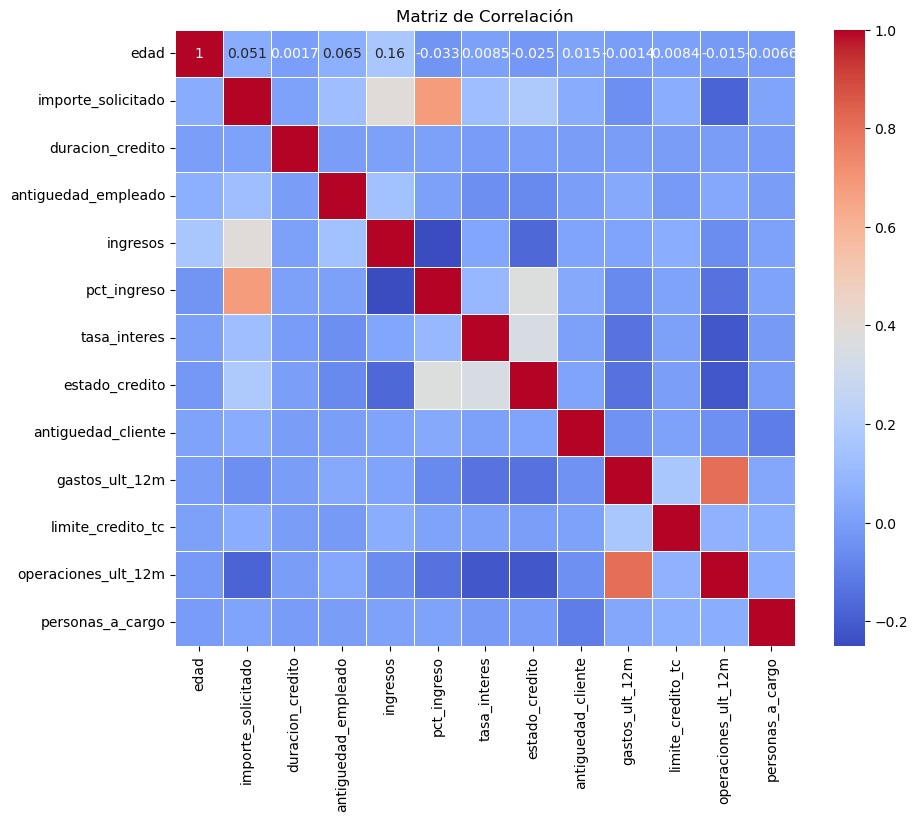

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

correlacion_matrix = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

In [33]:
correlacion_matrix

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,limite_credito_tc,operaciones_ult_12m,personas_a_cargo
edad,1.000000,0.051102,0.001651,0.065348,0.164347,-0.033116,0.008542,-0.025150,0.015428,-0.001402,0.008395,-0.014533,-0.006577
importe_solicitado,0.051102,1.000000,0.010685,0.121947,0.393555,0.682549,0.125438,0.182306,0.050935,-0.053507,0.055171,-0.180535,0.019881
duracion_credito,0.001651,0.010685,1.000000,-0.001709,0.005655,0.008321,-0.007404,-0.001037,-0.002379,-0.001507,-0.001632,-0.001355,-0.007783
antiguedad_empleado,0.065348,0.121947,-0.001709,1.000000,0.135727,0.006068,-0.051811,-0.068781,0.002340,0.041910,-0.012562,0.035465,-0.003250
ingresos,0.164347,0.393555,0.005655,0.135727,1.000000,-0.250152,0.025984,-0.170532,0.021446,0.022813,0.053213,-0.057209,0.013244
pct_ingreso,-0.033116,0.682549,0.008321,0.006068,-0.250152,1.000000,0.097325,0.372171,0.039312,-0.067988,0.018050,-0.141618,0.016578
tasa_interes,0.008542,0.125438,-0.007404,-0.051811,0.025984,0.097325,1.000000,0.348333,0.004450,-0.134341,0.006615,-0.218066,-0.012141
estado_credito,-0.025150,0.182306,-0.001037,-0.068781,-0.170532,0.372171,0.348333,1.000000,0.020199,-0.139385,0.001657,-0.218286,-0.009138
antiguedad_cliente,0.015428,0.050935,-0.002379,0.002340,0.021446,0.039312,0.004450,0.020199,1.000000,-0.037001,0.011956,-0.048829,-0.103885
gastos_ult_12m,-0.001402,-0.053507,-0.001507,0.041910,0.022813,-0.067988,-0.134341,-0.139385,-0.037001,1.000000,0.166117,0.807329,0.028531


LIMPIEZA OUTLIERS O ATIPICOS :

In [35]:
df_numeric.columns

Index(['edad', 'importe_solicitado', 'duracion_credito', 'antiguedad_empleado',
       'ingresos', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'antiguedad_cliente', 'gastos_ult_12m', 'limite_credito_tc',
       'operaciones_ult_12m', 'personas_a_cargo'],
      dtype='object')

In [39]:
outlier_umbral = 3


outlier_rows = []

# Itera a ttraves de las columnas del data train_sin_variables_corr_normalized
for column in df_numeric.columns:
    # Calcula el IQR para la columna actual
    Q1 = data_completa_sin_nulos[column].quantile(0.25)
    Q3 = data_completa_sin_nulos[column].quantile(0.75)
    IQR = Q3 - Q1

    # Verifica si cada fila tiene valores atípicos en la columna actual
    column_outliers = (data_completa_sin_nulos[column] < (Q1 - outlier_umbral * IQR)) | (data_completa_sin_nulos[column] > (Q3 + outlier_umbral * IQR))

    # Agrega las filas con valores atípicos de la columna actual a la lista
    outlier_rows.extend(data_completa_sin_nulos[column_outliers].index)

# Elimina duplicados en la lista de filas con valores atípicos
outlier_rows = list(set(outlier_rows))
print("indices de outliers a eliminar:", outlier_rows)

print("cantidad_filas_eliminar: ", str(len(outlier_rows)))
print("%_filas_eliminar: ", str((len(outlier_rows)/len(data_completa_sin_nulos.drop(columns="falta_pago")))*100))


indices de outliers a eliminar: [0, 8193, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 8207, 24, 25, 26, 8214, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 8222, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 8235, 51, 52, 53, 54, 55, 56, 8242, 58, 8250, 60, 61, 63, 64, 66, 67, 68, 69, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 8276, 86, 8279, 88, 89, 91, 92, 8283, 94, 8285, 97, 98, 99, 100, 101, 102, 103, 104, 107, 109, 110, 111, 112, 113, 8303, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 8331, 148, 149, 150, 151, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 170, 171, 172, 173, 8358, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 8380, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 8395, 210, 211, 8397, 8401, 214, 215, 216, 217, 219, 220, 221, 8413, 223, 224,

MODELADO:

Vuelvo dummi las variables categoricas :

In [42]:
data_completa_sin_nulos_dummi = pd.get_dummies(data_completa_sin_nulos)
data_completa_sin_nulos_dummi

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,nivel_tarjeta_Blue,nivel_tarjeta_Gold,nivel_tarjeta_Platinum,nivel_tarjeta_Silver
0,22,35000,3,123.0,59000,0.59,16.02,1,36.0,1088.0,...,False,False,False,False,True,False,True,False,False,False
1,21,1000,2,5.0,9600,0.10,11.14,0,39.0,1144.0,...,False,False,False,True,False,False,True,False,False,False
2,25,5500,3,1.0,9600,0.57,12.87,1,44.0,1291.0,...,False,False,False,False,True,False,True,False,False,False
3,23,35000,2,4.0,65500,0.53,15.23,1,36.0,1887.0,...,False,False,False,False,True,False,True,False,False,False
4,24,35000,4,8.0,54400,0.55,14.27,1,54.0,1314.0,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,25,7000,4,9.0,65000,0.11,11.66,0,36.0,10310.0,...,True,False,False,False,False,False,True,False,False,False
10123,22,9575,3,1.0,43000,0.22,6.62,0,36.0,8395.0,...,False,False,False,False,True,False,True,False,False,False
10124,22,9600,2,0.0,21600,0.44,7.49,1,36.0,10291.0,...,False,False,False,True,False,False,True,False,False,False
10125,23,9600,2,3.0,22000,0.44,13.16,1,25.0,10294.0,...,False,False,False,False,True,False,False,False,False,True


In [43]:
data_completa_sin_nulos_dummi.columns

Index(['edad', 'importe_solicitado', 'duracion_credito', 'antiguedad_empleado',
       'ingresos', 'pct_ingreso', 'tasa_interes', 'estado_credito',
       'antiguedad_cliente', 'gastos_ult_12m', 'limite_credito_tc',
       'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO', 'estado_civil_DESCONOCIDO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTERO',
       'estado_cliente_ACTIVO', 'estado_cliente_PASIVO', 'genero_F',
       'genero_M', 'nivel_educativo_DESCONOCIDO',
       'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPL

In [54]:
import mlflow
import mlflow.sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Dividir los datos en conjunto de entrenamiento y prueba
X = data_completa_sin_nulos_dummi.drop(columns=['falta_pago_Y',"falta_pago_N"])  
y = data_completa_sin_nulos_dummi['falta_pago_Y']  # Variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos  arbol de decision, logistico y maquina de soporte vectorial para clasificar si pagará o no :
models = {
    "RandomForest": RandomForestClassifier(n_estimators=100),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC()
}

# Iterar sobre los modelos
for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Entrenar el modelo
        model.fit(X_train, y_train)
        
        # Hacer predicciones en el conjunto de prueba
        y_pred = model.predict(X_test)
        
        # Calcular la precisión
        accuracy = accuracy_score(y_test, y_pred)
        print(accuracy)
        # Registrar los parámetros y metricas con MLflow
        mlflow.log_params(model.get_params())
        mlflow.log_metric("accuracy", accuracy)
        
        # Guardar el modelo
        mlflow.sklearn.log_model(model, f"{model_name}_model")

0.9146546883773161
0.8545760808534532
0.832678270634475
